In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", font_scale=1.2)

In [2]:
# Helper function for rendering a figure.
FIGURE_DIR = "../../figures/cartoons"
def render_figure(outpath):
    plt.savefig(f"{FIGURE_DIR}/{outpath}", dpi=300, bbox_inches="tight")
    print(f"Saved figure to {FIGURE_DIR}/{outpath}")

Saved figure to ../../figures/cartoons/cartoon_general_curve_empty.pdf


/var/folders/72/ykl8sn4d11nfbqbbzl2v6znc0000gq/T/ipykernel_27063/382274096.py:36: RankWarning: Polyfit may be poorly conditioned
  general_cartoon(auc=False)


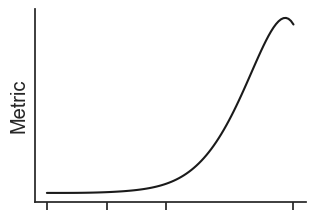

Saved figure to ../../figures/cartoons/cartoon_general_curve_shaded.pdf


/var/folders/72/ykl8sn4d11nfbqbbzl2v6znc0000gq/T/ipykernel_27063/382274096.py:40: RankWarning: Polyfit may be poorly conditioned
  general_cartoon(auc=True)


<Figure size 640x480 with 0 Axes>

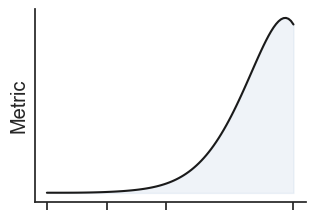

In [3]:
# GENERAL
def general_cartoon(auc=False):
    # Given points
    x_points = np.array([0, 1, 2, 5, 15, 20, 28, 31])
    y_points = np.array([0.001, 0.001, 0.001, 0.002, 0.05, 0.2, 0.85, 0.9])

    # Fit a polynomial
    coefficients = np.polyfit(x_points, y_points, 8)

    # Create a polynomial from the coefficients
    polynomial = np.poly1d(coefficients)

    # Generate x values for plotting the curve
    x_vals = np.linspace(0, 31, 100)

    # Calculate the corresponding y values using the polynomial
    y_vals = polynomial(x_vals)

    # Plot the points and the fitted curve
    plt.figure(figsize=(3.5, 2.5))
    plt.plot(x_vals, y_vals, color='k', lw=1.5)
#     plt.xlabel('Layer')
    plt.ylabel('Metric')

    xticks = [0,7.5,15,31]
    plt.xticks(xticks)
    plt.gca().set_xticklabels([])
    plt.gca().set_yticks([])
    
    if auc:
        plt.fill_between(x_vals, y_vals, color="lightsteelblue", alpha=0.2)
    
    sns.despine()


general_cartoon(auc=False)
render_figure("cartoon_general_curve_empty.pdf")
plt.show()
plt.clf()
general_cartoon(auc=True)
render_figure("cartoon_general_curve_shaded.pdf")

Saved figure to ../../figures/cartoons/cartoon_general_boosting_empty.pdf


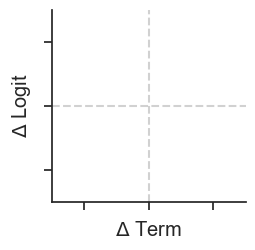

Saved figure to ../../figures/cartoons/cartoon_general_boosting_11.pdf


<Figure size 640x480 with 0 Axes>

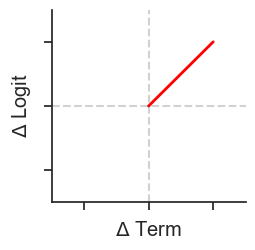

In [4]:
# GENERAL BOOSTING
def general_boosting_cartoon(add_11=False):
    # Plot the points and the fitted curve
    plt.figure(figsize=(2.5, 2.5))

    # Add <1,1> line
    if add_11:
        plt.plot([0,1], [0,1], color="red", zorder=-1, lw=2)
    
    plt.xlabel('$\\Delta$ Term')
    plt.ylabel('$\\Delta$ Logit')
    plt.gca().axhline(y=0, linestyle="--", color="k", alpha=0.2)
    plt.gca().axvline(x=0, linestyle="--", color="k", alpha=0.2)

    plt.gca().set_xticklabels([])
    plt.gca().set_yticklabels([])
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    
    sns.despine()

    
general_boosting_cartoon(add_11=False)
render_figure("cartoon_general_boosting_empty.pdf")
plt.show()
plt.clf()
general_boosting_cartoon(add_11=True)
render_figure("cartoon_general_boosting_11.pdf")

Saved figure to ../../figures/cartoons/cartoon_general_proj.pdf


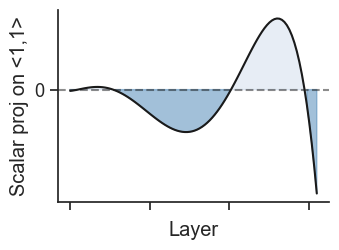

In [5]:
# Projections
def general_proj_cartoon():
    # Given points
    data = np.array([
        [0, -0.01],
        [2, -0.01],
        [5, -0.01],
        [8, -0.01],
        [10, -1],
        [15, -1.2],
        [22, 1],
        [26, 1.5],
        [28, 2],
        [30, -1]
    ])
    x_points = data[:, 0]
    y_points = data[:, 1]

    # Fit a polynomial
    coefficients = np.polyfit(x_points, y_points, 5)

    # Create a polynomial from the coefficients
    polynomial = np.poly1d(coefficients)

    # Generate x values for plotting the curve
    x_vals = np.linspace(0, 31, 100)

    # Calculate the corresponding y values using the polynomial
    y_vals = polynomial(x_vals)

    # Plot the points and the fitted curve
    plt.figure(figsize=(3.5, 2.5))
    plt.plot(x_vals, y_vals, color='k', lw=1.5)
    plt.xlabel('Layer')
    plt.ylabel('Scalar proj on <1,1>')
    plt.gca().axhline(y=0, linestyle="--", color="k", alpha=0.5)
    plt.gca().set_xticklabels([])
    plt.gca().set_yticks([0])
    
    
    FAVOR_CORRECT_COLOR = "lightsteelblue"
    FAVOR_WRONG_COLOR = "steelblue"
    plt.fill_between(x_vals, y_vals, where=y_vals<0, color=FAVOR_WRONG_COLOR, alpha=0.5)
    plt.fill_between(x_vals, y_vals, where=y_vals>0, color=FAVOR_CORRECT_COLOR, alpha=0.3)
    
#     for x in range(0, 32, 2):
#         y = polynomial(x)
#         if y > 0:
#             color = FAVOR_CORRECT_COLOR
#         else:
#             color = FAVOR_WRONG_COLOR
#         plt.plot([x,x], [0, y], zorder=-1, color=color, alpha=0.2)
    
    sns.despine()
    
general_proj_cartoon()
render_figure("cartoon_general_proj.pdf")